## Dominik Adamczyk
### Mownit Lab7 rozwiązania

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

Używane funkcje:

In [21]:
using Roots  
using Plots
using ForwardDiff
using DataFrames

Sprawdzenie, czy jest miejscem zerowym:

In [23]:
function my_iszero(g, x)
    return iszero(g(x)) || g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0
end

my_iszero (generic function with 1 method)

In [24]:
D(f) = x -> ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [51]:
using DataFrames, Roots, ForwardDiff
df = DataFrame(fun=String[], method=String[], iterations=Int64[], funCalls=Int64[], iszero = Bool[])
fun1(x) = sin(x) - x/2
fun2(x) = cos(x) - x
fun3(x) =  20.0 * x / ( 100.0 * x * x + 1.0 )
fun4(x) = 2*x-exp(-x)
fun5(x) = x*exp(-x)
fun6(x) = (x+3)*(x-1)^2
functions=Function[]
push!(functions, fun1)
push!(functions, fun2)
push!(functions, fun3)
push!(functions, fun4)
push!(functions, fun5)
push!(functions, fun6)
f_names = ["sin(x)-x/2",
           "cos(x) - x",
           "20.0 * x / ( 100.0 * x * x + 1.0 )",
           "2*x-exp(-x)",
           "x*exp(-x)",
           "(x+3)*(x-1)^2"]


D(f) = x->ForwardDiff.derivative(f, float(x))
ver=true
inteval = (0, 1)
for (i, fun) in enumerate(functions)
    println(f_names[i])
    tracker = Roots.Tracks()
    bis = find_zero(fun, inteval, Bisection(), verbose=ver, tracks = tracker)
    
    push!(df, (f_names[i], "Bisection", tracker.steps, tracker.fncalls, my_iszero(fun, bis)))
    
    tracker = Roots.Tracks()
    newton = find_zero((fun, D(fun)), 0, Roots.Newton(), verbose=ver, tracks = tracker)
    
    push!(df, (f_names[i], "Newton", tracker.steps, tracker.fncalls, my_iszero(fun, newton)))
    
    tracker = Roots.Tracks()
    steff = find_zero(fun, 0, Order2(), verbose=ver, tracks = tracker)

    push!(df, (f_names[i], "Steffensen", tracker.steps, tracker.fncalls, my_iszero(fun, steff)))
end

df

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 3.027727226159662e-06
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



sin(x)-x/2


Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.00012110908860377758
x₂ = 0,	 fx₂ = 0



cos(x) - x


Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.25048828125, 0.50048828125 )
(a₁₀, b₁₀) = ( 0.25048828125, 0.3753662109375 )
(a₁₁, b₁₁) = ( 0.31292724609375, 0.3753662109375 )
(a₁₂, b₁₂) = ( 0.344146728515625, 0.3753662109375 )
(a₁₃, b₁₃) = ( 0.344146728515625, 0.3597564697265625 )
(a₁₄, b₁₄) = ( 0.344146728515625, 0.35195159912109375 )
(a₁₅, b₁₅) = ( 0.34804916381835938, 0.35195159912109375 )
(a₁₆, b₁₆) = ( 0.35000038146972656, 0.35195159912109375 )
(a₁₇, b₁₇) = ( 0.3509759

Results of univariate zero finding:

* Converged to: 0.3517337112491958
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 0.33333333333333331,	 fx₂ = -0.049864643907122641
x₃ = 0.35168933155541537,	 fx₃ = -0.00011997974912580922
x₄ = 0.35173371099294265,	 fx₄ = -6.9277206193874008e-10
x₅ = 0.35173371124919578,	 fx₅ = -1.1102230246251565e-16



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Order2()
* iterations: 5
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -0.99998183365497706
x₂ = 0,	 fx₂ = -1
x₃ = 0.33333366974734885,	 fx₃ = -0.049863730027956632
x₄ = 0.35082722371724301,	 fx₄ = -0.0024509486253887491
x₅ = 0.35173153265646406,	 fx₅ = -5.8897561466819681e-06
x₆ = 0.35173371125024777,	 fx₆ = 2.843947299879801e-12
x₇ = 0.35173371124919584,	 fx₇ = 0



20.0 * x / ( 100.0 * x * x + 1.0 )


Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 6.0554177839757365e-06
x₂ = 0,	 fx₂ = 0



2*x-exp(-x)


Results of univariate zero finding:

* Converged to: 1.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: 0.9999999893171166
* Algorithm: Roots.Newton()
* iterations: 26
* function evaluations ≈ 52
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 3
x₂ = 0.59999999999999998,	 fx₂ = 0.57600000000000018
x₃ = 0.81176470588235294,	 fx₃ = 0.13506045186240584
x₄ = 0.90826507818317204,	 fx₄ = 0.032889207013273039
x₅ = 0.95467723287473649,	 fx₅ = 0.008123512971538743
x₆ = 0.97746922076976495,	 fx₆ = 0.0020191066159544178
x₇ = 0.98876660798474947,	 fx₇ = 0.00050333885308786899
x₈ = 0.99439122417482817,	 fx₈ = 0.00012565702210396592
x₉ = 0.99719758237940248,	 fx₉ = 3.1392169169394192e-05
x₁₀ = 0.99859928255261032,	 fx₁₀ = 7.8452892489345154e-06
x₁₁ = 0.99929976396633591,	 fx₁₁ = 1.9609786642799847e-06
x₁₂ = 0.99964991263687364,	 fx₁₂ = 4.9020174016911134e-07
x₁₃ = 0.99982496397951515,	 fx₁₃ = 1.225450711836327e-07
x₁₄ = 0.99991248390473375,	 fx₁₄ = 3.0635597430973551e-08
x₁₅ = 0.99995624243107428,	 fx₁₅ = 7.6588

Results of univariate zero finding:

* Converged to: 0.9999999882918915
* Algorithm: Order2()
* iterations: 28
* function evaluations ≈ 50
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 2.9999697227644067
x₂ = 0,	 fx₂ = 3
x₃ = 0.60000072665724669,	 fx₃ = 0.57599802349376761
x₄ = 0.74257455126588756,	 fx₄ = 0.24801241260040122
x₅ = 0.85038439730926052,	 fx₅ = 0.08619019465664586
x₆ = 0.9078063739355543,	 fx₆ = 0.033215043839825133
x₇ = 0.94380954601913736,	 fx₇ = 0.012452054582524767
x₈ = 0.96540149785098539,	 fx₈ = 0.0047468090470904525
x₉ = 0.97870319885823054,	 fx₉ = 0.0018045557117044276
x₁₀ = 0.98686145642202372,	 fx₁₀ = 0.00068821731656964601
x₁₁ = 0.99361767553967284,	 fx₁₁ = 0.00016267628404484447
x₁₂ = 0.99685251827990995,	 fx₁₂ = 3.9595383741187911e-05
x₁₃ = 0.99843683271321282,	 fx₁₃ = 9.7701482792188642e-06
x₁₄ = 0.99922101840178035,	 fx₁₄ = 2.4267766258204488e-06
x₁₅ = 0.99961115466009343,	 fx₁₅ = 6.047439997812852

x*exp(-x)
(x+3)*(x-1)^2


Row,fun,method,iterations,funCalls,iszero
,String,String,Int64,Int64,Bool
1,sin(x)-x/2,Bisection,0,3,true
2,sin(x)-x/2,Newton,1,2,true
3,sin(x)-x/2,Steffensen,0,2,true
4,cos(x) - x,Bisection,60,63,true
5,cos(x) - x,Newton,5,10,true
6,cos(x) - x,Steffensen,6,10,true
7,20.0 * x / ( 100.0 * x * x + 1.0 ),Bisection,0,3,true
8,20.0 * x / ( 100.0 * x * x + 1.0 ),Newton,1,2,true
9,20.0 * x / ( 100.0 * x * x + 1.0 ),Steffensen,0,2,true


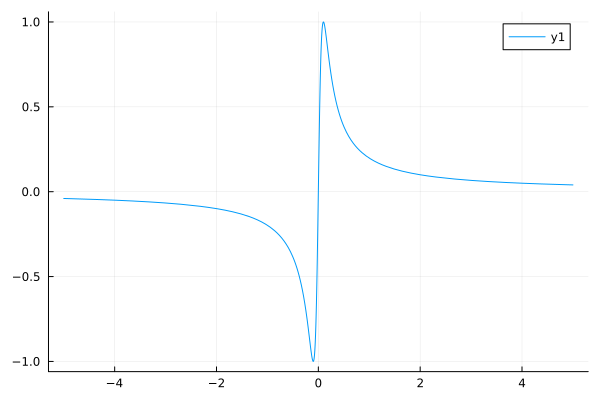

In [37]:
using Plots
xVals = -5:5
fun(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )
plot(fun, extrema(xVals)...)

In [53]:
df2 = DataFrame(method=String[],iterations=Int64[],funCalls=Int64[])

tracker = Roots.Tracks()
bis = find_zero(fun, (0,1), Bisection(), verbose=true, tracks = tracker)
push!(df2,("Bisection", tracker.steps, tracker.fncalls))
    
tracker = Roots.Tracks()
newton = find_zero((fun, D(fun)), 0.5, Roots.Newton(), verbose=true, tracks = tracker)
push!(df2,("Newton", tracker.steps, tracker.fncalls))

tracker = Roots.Tracks()    
steff = find_zero(fun, 0.5, Order2(), verbose=true, tracks = tracker)
push!(df2,("Steffensen", tracker.steps, tracker.fncalls))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: 1.7692082742525242e7
* Algorithm: Roots.Newton()
* iterations: 25
* function evaluations ≈ 50
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0.5,	 fx₁ = 0.38461538461538464
x₂ = 1.0416666666666667,	 fx₂ = 0.19024668653687615
x₃ = 2.1027119264474732,	 fx₃ = 0.094900624565900232
x₄ = 4.2149569405496665,	 fx₄ = 0.047423376014231071
x₅ = 8.4346615604156199,	 fx₅ = 0.02370834802664842
x₆ = 16.871694622221174,	 fx₆ = 0.011853757352365546
x₇ = 33.744574703465858,	 fx₇ = 0.005926826619638656
x₈ = 67.48974210000361,	 fx₈ = 0.0029634068035656502
x₉ = 134.97978054198882,	 fx₉ = 0.001481702588526559
x₁₀ = 269.95970925439917,	 fx₁₀ = 0.00074085119260704126
x₁₁ = 539.919492593938,	 fx₁₁ = 0.00037042558359651575
x₁₂ = 1079.839022230437,	 fx₁₂ = 0.00018521279020988299
x₁₃ = 2159.6780629821533,	 fx₁₃ = 9.2606394906394682e-05
x₁₄ = 4319.3561352249462,	 fx₁₄ = 4.6303197428378977e-05
x₁₅ = 8638.7122750802118,	 fx₁₅ = 2.31515

Results of univariate zero finding:

* Converged to: 1.865617634289287e7
* Algorithm: Order2()
* iterations: 27
* function evaluations ≈ 49
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0.50000605547278665,	 fx₁ = 0.38461108491729218
x₂ = 0.5,	 fx₂ = 0.38461538461538464
x₃ = 1.041672448805147,	 fx₃ = 0.19024564979811401
x₄ = 1.571851836545477,	 fx₄ = 0.12672554577520545
x₅ = 2.6295842395958005,	 fx₅ = 0.07594781576875255
x₆ = 4.2116255334720165,	 fx₆ = 0.047460845776059538
x₇ = 6.8473926185384979,	 fx₇ = 0.029201969902027232
x₈ = 11.062854272250227,	 fx₈ = 0.018077040045421724
x₉ = 17.912611538705306,	 fx₉ = 0.011164969806109237
x₁₀ = 35.83750426600821,	 fx₁₀ = 0.0055807023081587944
x₁₁ = 71.68114726977187,	 fx₁₁ = 0.0027901284839331104
x₁₂ = 143.36536367657504,	 fx₁₂ = 0.0013950364130126478
x₁₃ = 286.73226188884632,	 fx₁₃ = 0.00069751472804685153
x₁₄ = 573.46529102748946,	 fx₁₄ = 0.00034875692922946733
x₁₅ = 1146.9309655834297,	 fx₁₅ = 0.00017437841028023

Row,method,iterations,funCalls
,String,Int64,Int64
1,Bisection,0,3
2,Newton,25,50
3,Steffensen,27,49


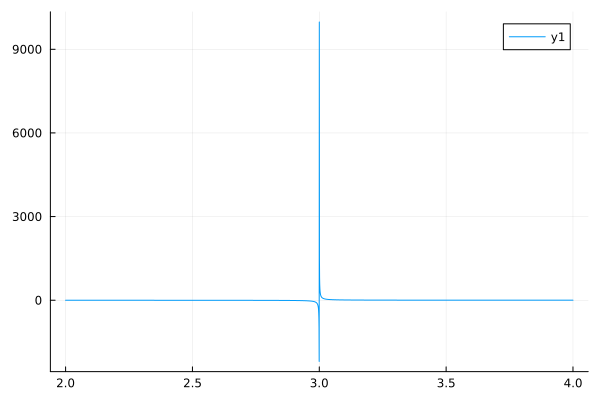

In [65]:
f1(x) = 1/(x-3) #not continuous function
xVals = 2:4
plot(f1, extrema(xVals)...)

In [110]:
tracker = Roots.Tracks()
result = find_zero(f1, (2,4), Bisection(), verbose=true, tracks = tracker)
f1(result)

Results of univariate zero finding:

* Converged to: 2.9999999999999996
* Algorithm: Bisection()
* iterations: 51
* function evaluations ≈ 54
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( 2, 3 )
(a₁, b₁) = ( 2.5, 3 )
(a₂, b₂) = ( 2.75, 3 )
(a₃, b₃) = ( 2.875, 3 )
(a₄, b₄) = ( 2.9375, 3 )
(a₅, b₅) = ( 2.96875, 3 )
(a₆, b₆) = ( 2.984375, 3 )
(a₇, b₇) = ( 2.9921875, 3 )
(a₈, b₈) = ( 2.99609375, 3 )
(a₉, b₉) = ( 2.998046875, 3 )
(a₁₀, b₁₀) = ( 2.9990234375, 3 )
(a₁₁, b₁₁) = ( 2.99951171875, 3 )
(a₁₂, b₁₂) = ( 2.999755859375, 3 )
(a₁₃, b₁₃) = ( 2.9998779296875, 3 )
(a₁₄, b₁₄) = ( 2.99993896484375, 3 )
(a₁₅, b₁₅) = ( 2.999969482421875, 3 )
(a₁₆, b₁₆) = ( 2.9999847412109375, 3 )
(a₁₇, b₁₇) = ( 2.9999923706054688, 3 )
(a₁₈, b₁₈) = ( 2.9999961853027344, 3 )
(a₁₉, b₁₉) = ( 2.9999980926513672, 3 )
(a₂₀, b₂₀) = ( 2.9999990463256836, 3 )
(a₂₁, b₂₁) = ( 2.9999995231628418, 3 )
(a₂₂, b₂₂) = ( 2.9999997615814209, 3 )
(a₂₃, b₂₃) = ( 2.9999998807907104, 3 )
(a₂₄, b₂₄) = ( 

-2.251799813685248e15

Funkcja jest nieciągła, ale ma przeciwne znaki na końcach przedziału - algorytm bisekcji zwraca błąd

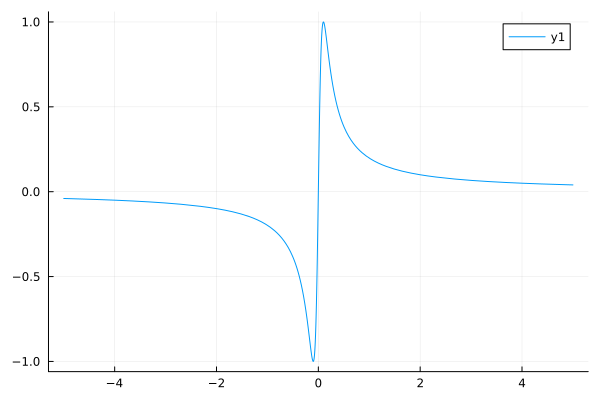

In [117]:
using Plots
xVals = -5:5
fun(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )
plot(fun, extrema(xVals)...)

In [118]:
tracker = Roots.Tracks()
newton = find_zero((fun, D(fun)), 1, Roots.Newton(), maxevals=10, verbose=true, tracks = tracker)
f2(newton)


Results of univariate zero finding:

* Converged to: 2075.4541210123375
* Algorithm: Roots.Newton()
* iterations: 11
* function evaluations ≈ 22

Trace:
x₁ = 1,	 fx₁ = 0.19801980198019803
x₂ = 2.0202020202020203,	 fx₂ = 0.098758018165988795
x₃ = 4.0503283574619111,	 fx₃ = 0.049348631460261541
x₄ = 8.1055975979723147,	 fx₄ = 0.024670551571965179
x₅ = 16.21366300221414,	 fx₅ = 0.01233480628720353
x₆ = 32.428559578903176,	 fx₆ = 0.0061673444880704763
x₇ = 64.857735903984604,	 fx₇ = 0.0030836649130873794
x₈ = 129.71578017592668,	 fx₈ = 0.0015418315402062506
x₉ = 259.43171453519062,	 fx₉ = 0.00077091565556191546
x₁₀ = 518.86350616196967,	 fx₁₀ = 0.00038545781346333691
x₁₁ = 1037.7270508697234,	 fx₁₁ = 0.0001927289049419668
x₁₂ = 2075.4541210123375,	 fx₁₂ = 9.6364452247270707e-05



8.940038983201078e9

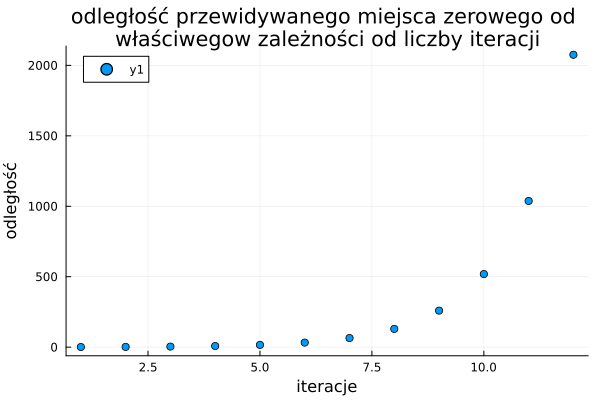

In [91]:
x = 1:12
y = [1,
2.0202020202020203,
4.0503283574619111,
8.1055975979723147,
16.21366300221414,	
32.428559578903176,
64.857735903984604,
129.71578017592668,
259.43171453519062,
 518.86350616196967,
 1037.7270508697234,
 2075.4541210123375]
scatter(x, y, title="odległość przewidywanego miejsca zerowego od \nwłaściwegow zależności od liczby iteracji", xlabel="iteracje", ylabel="odległość")

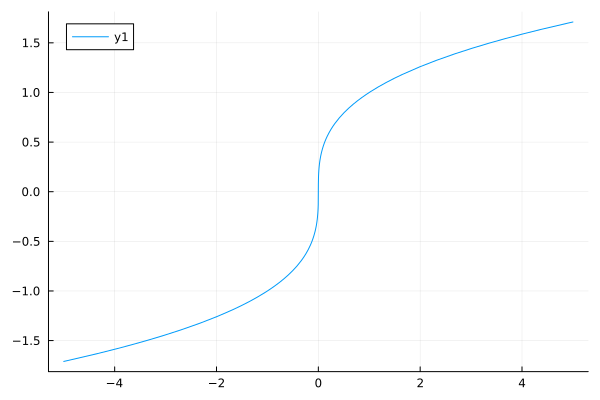

In [121]:
using Plots
xVals = -5:5
fun(x) = cbrt(x)
plot(fun, extrema(xVals)...)
# ylims!((-10, 10))

In [123]:
tracker = Roots.Tracks()
steff = find_zero(fun, -1, Order2(),maxevals=10, verbose=true, tracks = tracker)
f1(steff)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Order2()

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.99999798149888541
x₂ = -1,	 fx₂ = -1
x₃ = 1.9999939445714054,	 fx₃ = 1.2599197783332645
x₄ = 0.32747806950207758,	 fx₄ = 0.68927745515102268
x₅ = -1.6927497321068508,	 fx₅ = -1.1917840932040911
x₆ = -0.41279408115456118,	 fx₆ = -0.74457963532567939
x₇ = 1.7182868931728748,	 fx₇ = 1.1977473696683367
x₈ = 0.40414327832940677,	 fx₈ = 0.73934156084206903
x₉ = -1.7153782736700312,	 fx₉ = -1.1970711614934944
x₁₀ = -0.40511104768204609,	 fx₁₀ = -0.73993123763429969
x₁₁ = 1.7157005453469014,	 fx₁₁ = 1.1971461222139685
x₁₂ = 0.40500360201991525,	 fx₁₂ = 0.73986581571115861



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Algorithm failed to converge")

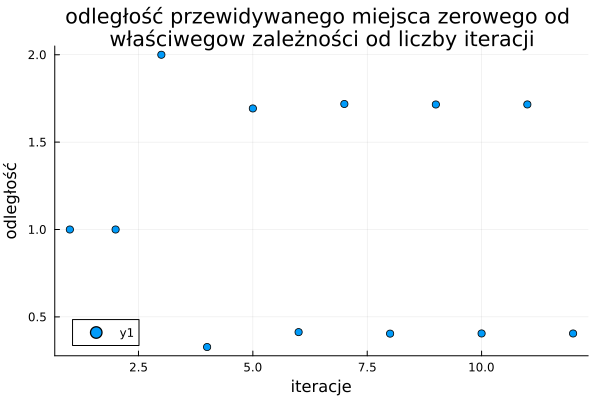

In [132]:
 x= 1:12

 y= [0.99999394450887913,	
 1,
 1.9999939445714054,	
 0.32747806950207758,	
 1.6927497321068508,	
 0.41279408115456118,	
 1.7182868931728748,	
 0.40414327832940677,	
 1.7153782736700312,	
 0.40511104768204609,	
 1.7157005453469014,	
 0.40500360201991525]

 scatter(x, y, title="odległość przewidywanego miejsca zerowego od \nwłaściwegow zależności od liczby iteracji", xlabel="iteracje", ylabel="odległość")

Ta funkcja sprawia, że metoda Steffensena nie działa, ponieważ zapętla się w cyklu (czyli pochodna w kolejnych iteracjach wraca na miejsce z poprzednią wartością). Istnieje też matematyczny dowód rozbieżności.

Metoda Steffensena to wersja metody newtona, czyli $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = x - \frac{x_n^{1/3}}{\frac{1}{3} x_n^{-2/3}} = x_n-3x_n = -2x_n$

$\lim_{x\to 0} f'(x) = \infty$

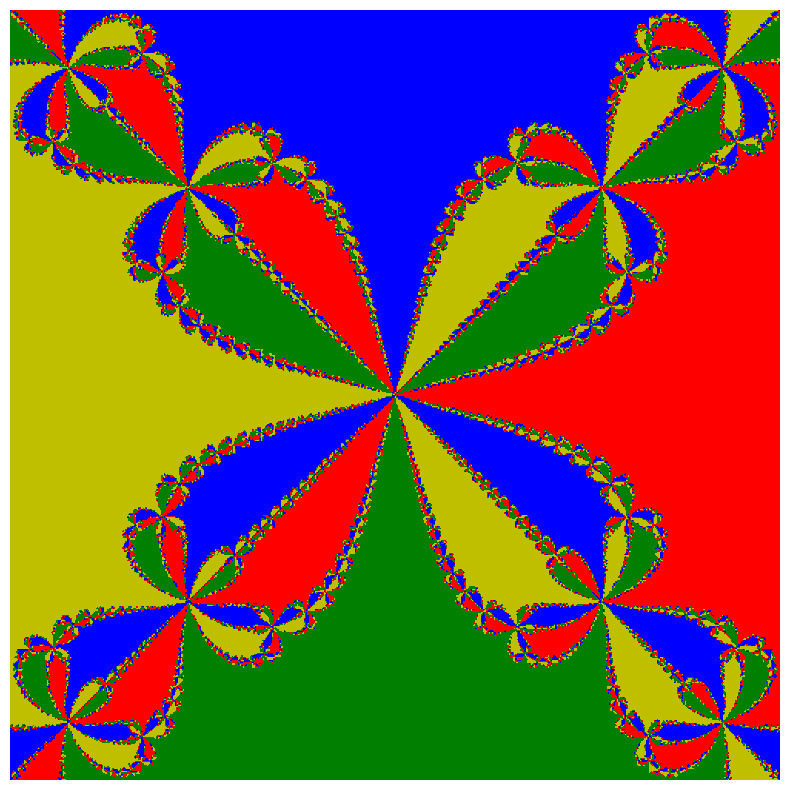

In [53]:
# https://scipython.com/book2/chapter-8-scipy/examples/the-newton-fractal/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['b', 'r', 'g', 'y']

TOL = 1.e-11

def newton(z0, f, fprime, MAX_IT=1000):
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
            # else:
            #     print("False")
    nroots = len(roots)
    if nroots > len(colors):
        cmap = 'hsv'
    else:
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)

C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\3828890696.py:1: RuntimeWarning: overflow encountered in sin
  f = lambda z: z**4*np.sin(z) - 1
C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\3828890696.py:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  f = lambda z: z**4*np.sin(z) - 1
C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\3828890696.py:2: RuntimeWarning: overflow encountered in sin
  fprime = lambda z: z**3*(4*np.sin(z)+z*np.cos(z))
C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\3828890696.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  fprime = lambda z: z**3*(4*np.sin(z)+z*np.cos(z))
C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\3828890696.py:2: RuntimeWarning: overflow encountered in cos
  fprime = lambda z: z**3*(4*np.sin(z)+z*np.cos(z))
C:\Users\Domin\AppData\Local\Temp\ipykernel_12584\4190225416.py:13: RuntimeWarning: invalid value encountered in cdouble_scalars
  dz = f(z)/fprime(z)
C:\Users\Domin\AppData\Local\Temp\

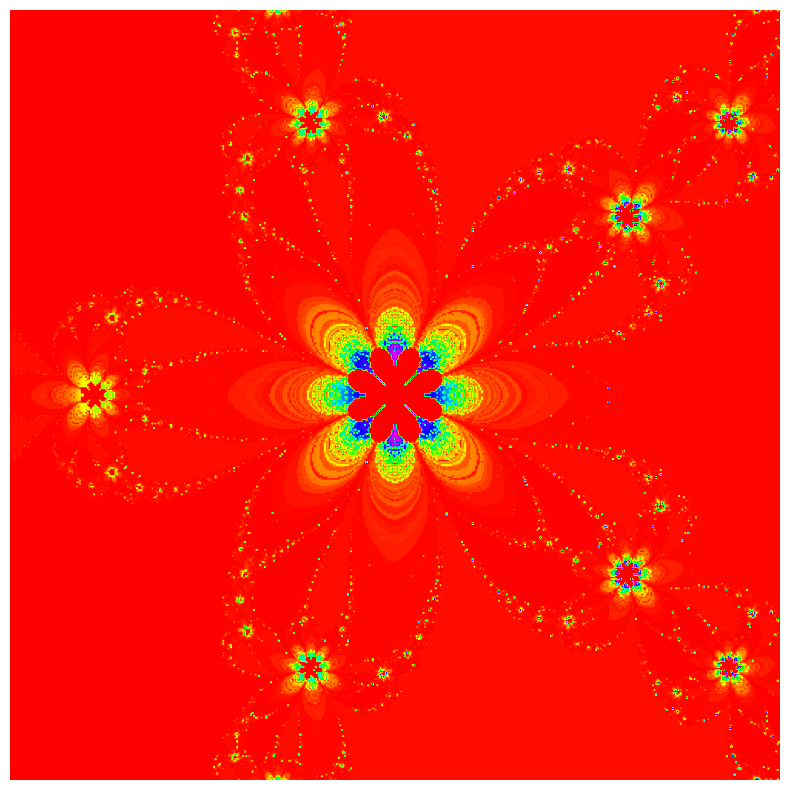

In [54]:

f = lambda z: z**4*np.sin(z) - 1
fprime = lambda z: z**3*(4*np.sin(z)+z*np.cos(z))

plot_newton_fractal(f, fprime, n=500)

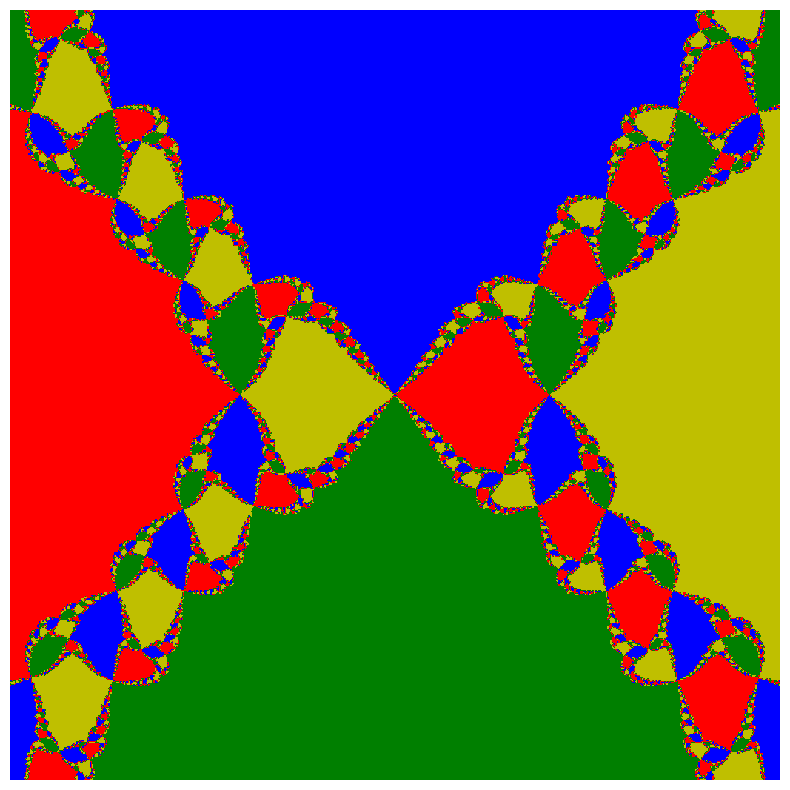

In [55]:
f = lambda z: (z**2+1)*(z**2-2.3)
fprime = lambda z: z*(20*z**2-13)/5

plot_newton_fractal(f, fprime, n=500, domain=(-2, 2, -2, 2))

Wstęga Newtona powstaje poprzez przypisanie do każdego punktu x płaszczyzny zespolonej pierwiastka (koloru) do którego będzie dążyła metoda newtona (dla danej funkcji zespolonej f) jeżeli za punkt początkowy obierzemy punkt x.

Wstęga Newtona ma tą właściwość, że dla każdego punktu brzegowego kula o środku w tym punkcie zawiera punkty należące do każdego ze zbiorów (kolorów).

https://www.youtube.com/watch?v=-RdOwhmqP5s